In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

### Defining Problem Statement and Analysing basic metrics

#### In this business case study we wants to identify the characteristics of the target audience for each type of treadmills offered by the company so that we can recommend relevant products to the new customers.


In [10]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [97]:
#59% of customers having martial status partnered prefer treadmills followed by single having 40% probability of buying treadmil
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

<AxesSubplot:>

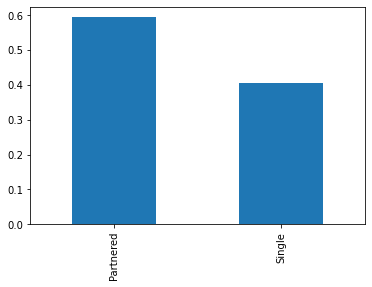

In [12]:
#barchart
df['MaritalStatus'].value_counts(normalize=True).plot(kind='bar')
# in the given data 59% are partnered and 40% are single

In [11]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

<AxesSubplot:>

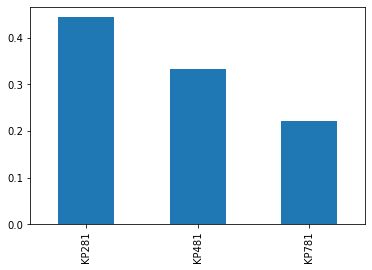

In [79]:
df['Product'].value_counts(normalize=True).plot(kind='bar')
# given bar graph states that there is high demand of product type 'KP281' followed by 'kp481'

In [15]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [19]:
# Contingency Table
# Analysing the probability of product with gender
pd.crosstab(index=df["Product"], columns=df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


#### for product type KP281 both male and female having same probability of 0.22

In [31]:
#probability of female buying product type 'KP281'
female_kp281 = df[(df['Gender']=='Female') & (df['Product']=='KP281')]
prob_female_kp281 = len(female_kp281)/len(df)
prob_female_kp281

0.2222222222222222

In [36]:
#probability of male buying product type 'KP281'
male_kp281 = df[(df['Gender']=='Male') & (df['Product']=='KP281')]
prob_male_kp281 = len(male_kp281)/len(df)
prob_male_kp281

0.2222222222222222

#### for product type KP481 - male(0.17) has slightly higher probability of then female(0.16)

In [37]:
#probability of female buying product type 'KP481'
female_kp481 = df[(df['Gender']=='Female') & (df['Product']=='KP481')]
prob_female_kp481 = len(female_kp481)/len(df)
prob_female_kp481

0.16111111111111112

In [38]:
#probability of male buying product type 'KP481'
male_kp481 = df[(df['Gender']=='Male') & (df['Product']=='KP481')]
prob_male_kp481 = len(male_kp481)/len(df)
prob_male_kp481

0.17222222222222222

#### for product type KP781 - probability of male(0.18) is higher than female(0.038)

In [39]:
#probability of female buying product type 'KP781'
female_kp781 = df[(df['Gender']=='Female') & (df['Product']=='KP781')]
prob_female_kp781 = len(female_kp781)/len(df)
prob_female_kp781

0.03888888888888889

In [40]:
#probability of male buying product type 'KP781'
male_kp781 = df[(df['Gender']=='Male') & (df['Product']=='KP781')]
prob_male_kp781 = len(male_kp781)/len(df)
prob_male_kp781

0.18333333333333332

In [42]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [44]:
#analysis on income
print("mean of income",np.mean(df.Income))
print("median of income",np.median(df.Income))

mean of income 53719.57777777778
median of income 50596.5


#### we can see from above analysis there is large difference between mean and median of income so there might some outlier in income

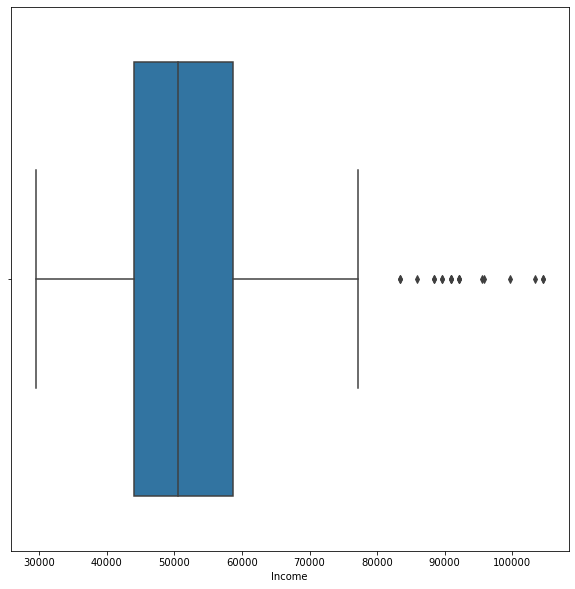

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,
           x='Income')
plt.show()

#### from the above boxplot we can state that 25th percentile of our customer income is 44000 and 50th percentile is approx 50500 and 75% our customer income is below 59000 

#### income > 80500  and income less than 22144.875  are ouliers`

In [82]:
p_25 = df["Income"].quantile(0.25) # Q1 or p_25
p_50 = df["Income"].quantile(0.5)  # Q2 or p_50 or median
p_75 = df["Income"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

44058.75 50596.5 58668.0


In [83]:
iqr = p_75 - p_25 
lower = max(p_25 - 1.5*iqr, 0)
upper = p_75 + 1.5*iqr
print(lower, upper)
print(iqr)

22144.875 80581.875
14609.25


In [84]:
income_outlier = df[df["Income"] > upper]
len(income_outlier)

19

#### approx 10% outlier are there in income

In [156]:
len(income_outlier) / len(df)

0.10555555555555556

In [166]:
#analysis on miles
print("mean of income",np.mean(df.Miles))
print("median of income",np.median(df.Miles))

mean of income 103.19444444444444
median of income 94.0


In [168]:
p_25 = df["Miles"].quantile(0.25) # Q1 or p_25
p_50 = df["Miles"].quantile(0.5)  # Q2 or p_50 or median
p_75 = df["Miles"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

66.0 94.0 114.75


In [169]:
iqr = p_75 - p_25 
lower = max(p_25 - 1.5*iqr, 0)
upper = p_75 + 1.5*iqr
print(lower, upper)
print(iqr)

0 187.875
48.75


In [170]:
Miles_outlier = df[df["Miles"] > upper]
len(Miles_outlier)

13

#### 7% outlier found in miles

In [171]:
len(Miles_outlier) / len(df)

0.07222222222222222

<AxesSubplot:xlabel='Miles'>

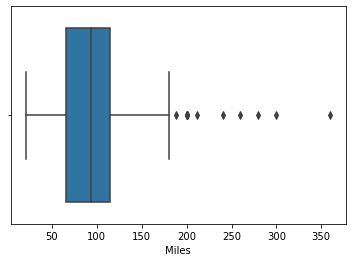

In [172]:
sns.boxplot(data=df,
           x='Miles')

#### from the above boxplot we can infer that 25th percentile is 66, 50th percentile is 94 and 75th percentile is 114

#### miles greater than 188 are outliers

In [49]:
# analysis on age
print('mean_age',np.mean(df.Age))
print('median_age',np.median(df.Age))

mean_age 28.788888888888888
median_age 26.0


In [60]:
df['Age'].value_counts().head()

25    25
23    18
24    12
26    12
28     9
Name: Age, dtype: int64

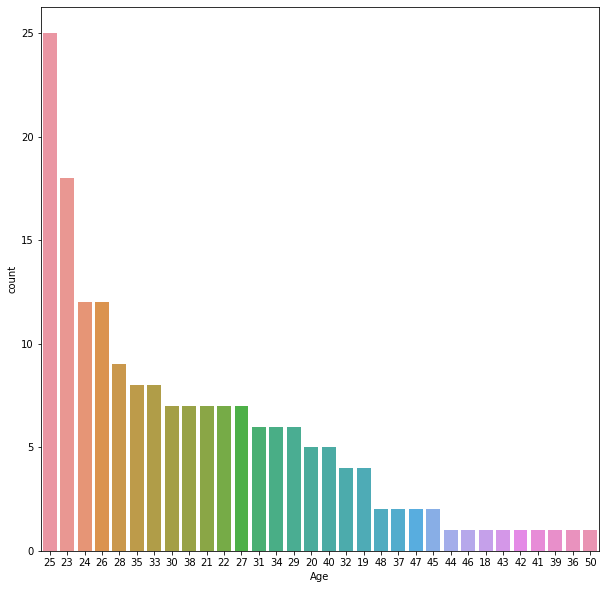

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,
             x='Age',
             order=df['Age'].value_counts().index)
plt.show()

#### the above countplot states that customers age =25 years has the high demand of treadmills followed by 23 years and 24 years

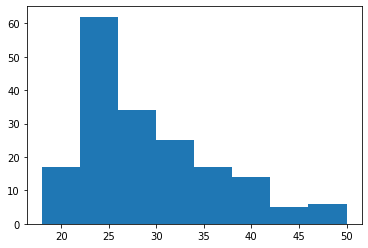

In [76]:
count,bins,_=plt.hist(data=df,
            x='Age',bins=8)

In [77]:
count

array([17., 62., 34., 25., 17., 14.,  5.,  6.])

In [78]:
bins

array([18., 22., 26., 30., 34., 38., 42., 46., 50.])

#### the above histogram states that customers age in the range 22 - 26 has highest demands of treadmills

In [80]:
# Contingency Table
# Analysing the probability of product with martial_status
pd.crosstab(index=df["Product"], columns=df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


####   partnered buying product type 'kp281'  having probability 26 %

In [88]:
#probability of partnered buying product type 'KP281'
partnered_kp281 = df[(df['MaritalStatus']=='Partnered') & (df['Product']=='KP281')]
prob_partnered_kp281 = len(partnered_kp281)/len(df)
prob_partnered_kp281

0.26666666666666666

#### single buying product type 'kp281'  having probability 17% which is less than partnered

In [89]:
#probability of single buying product type 'KP281'
Single_kp281 = df[(df['MaritalStatus']=='Single') & (df['Product']=='KP281')]
prob_Single_kp281 = len(Single_kp281)/len(df)
prob_Single_kp281

0.17777777777777778

#### probability of customers having martial status partnered buying product type 'kp481'  is 20 %

In [93]:
#probability of partnered buying product type 'KP481'
partnered_kp481 = df[(df['MaritalStatus']=='Partnered') & (df['Product']=='KP481')]
prob_partnered_kp481 = len(partnered_kp481)/len(df)
prob_partnered_kp481

0.2

#### probability of customers having martial status Single buying product type 'kp481'  is 13% which is less than partnered probability

In [92]:
#probability of Single buying product type 'KP481'
Single_kp481 = df[(df['MaritalStatus']=='Single') & (df['Product']=='KP481')]
prob_Single_kp481 = len(Single_kp481)/len(df)
prob_Single_kp481

0.13333333333333333

#### probability of customers having martial status partnerd buying product type 'kp781'  is 12%

In [94]:
#probability of partnered buying product type 'KP781'
partnered_kp781 = df[(df['MaritalStatus']=='Partnered') & (df['Product']=='KP781')]
prob_partnered_kp781 = len(partnered_kp781)/len(df)
prob_partnered_kp781

0.12777777777777777

#### probability of customers having martial status partnerd buying product type 'kp781'  is 9%

In [95]:
#probability of Single buying product type 'KP781'
Single_kp781 = df[(df['MaritalStatus']=='Single') & (df['Product']=='KP781')]
prob_Single_kp781 = len(Single_kp781)/len(df)
prob_Single_kp781

0.09444444444444444

In [121]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [108]:
k281=df.loc[df['Product']=='KP281']
k481=df.loc[df['Product']=='KP481']
k781=df.loc[df['Product']=='KP781']

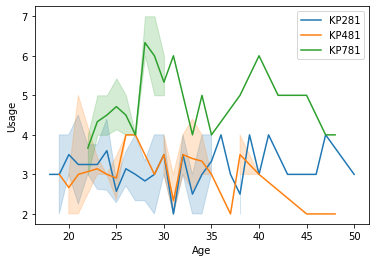

In [115]:
sns.lineplot(data=k281,
            x='Age',
            y="Usage",
            label='KP281')
sns.lineplot(data=k481,
            x='Age',
            y="Usage",
            label='KP481')
sns.lineplot(data=k781,
            x='Age',
            y="Usage",
            label='KP781')
plt.legend()

#### we can infer from the above lineplot that the average usage of product type KP781 is much higher than KP281 & KP481

<AxesSubplot:xlabel='Age', ylabel='Income'>

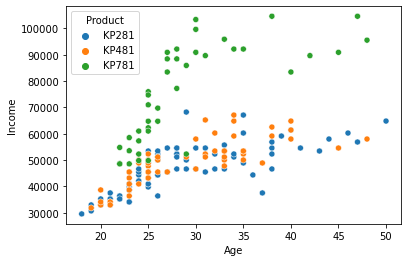

In [116]:
sns.scatterplot(data=df,
               x='Age',
               y='Income',
               hue='Product')

#### we can infer from this scatterplot that customers having income greater than 50000 tend to buy product type KP781 and customers having income less than 55000 tend to buy product type 'KP481' and KP281

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

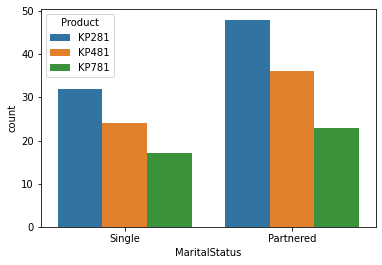

In [119]:
sns.countplot(data=df,
            x='MaritalStatus',
            hue='Product')

#### we can infer from above countplot that single has high possibility of buying product type KP281 similar to partnered and partnered has high possibility of buying treadmills.

<AxesSubplot:xlabel='Product', ylabel='Income'>

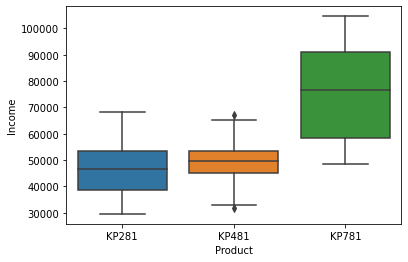

In [122]:
sns.boxplot(data=df,
           x='Product',
           y='Income')

#### we can infer from the above boxplot that customers having high income more likely to buy product kp781

In [129]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [130]:
df['Education'].value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64

<AxesSubplot:xlabel='Product', ylabel='Education'>

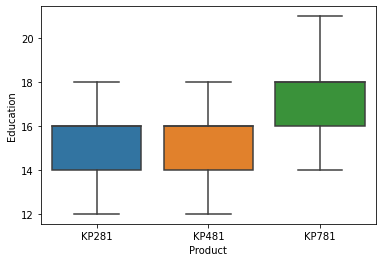

In [125]:
sns.boxplot(data=df,
           x='Product',
           y='Education')

#### we can infer from the above boxplot that highly educated customers more likely to buy product kp781

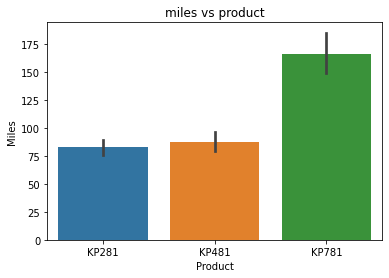

In [139]:
# miles vs product
sns.barplot(data=df,
           x='Product',
           y='Miles')
plt.title('miles vs product')
plt.show()

#### from the above barplot we can infer that customers wo walk more prefer to buy product type KP781

<AxesSubplot:xlabel='Gender', ylabel='Income'>

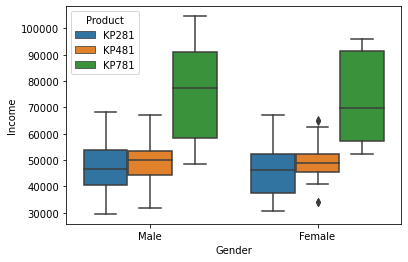

In [143]:
sns.boxplot(data=df,
           x='Gender',
           y='Income',
           hue='Product')

#### from the above boxplot we can infer that male and female having higher income both more likely to buy product KP781

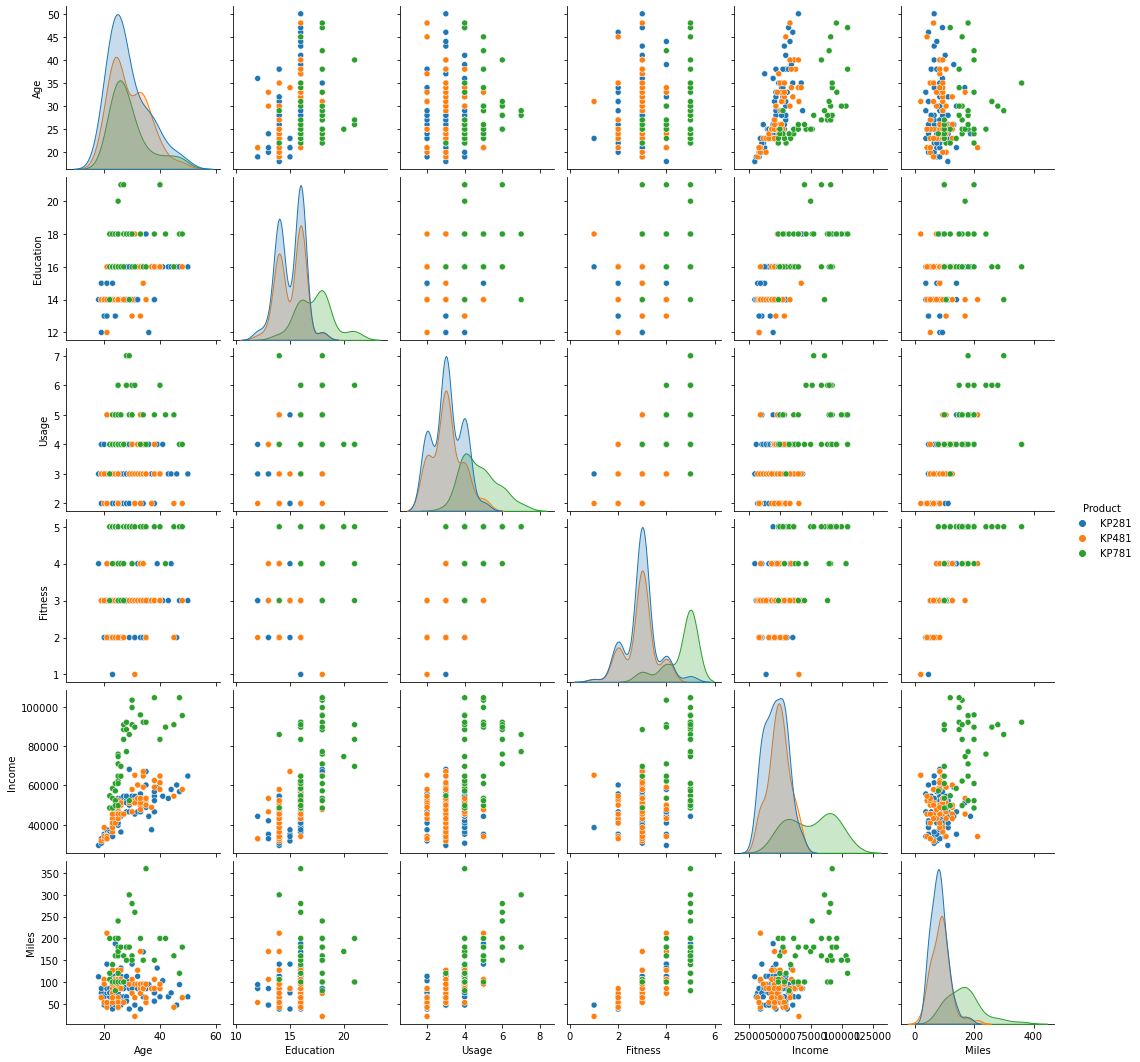

In [147]:
sns.pairplot(data=df,hue='Product')

<AxesSubplot:>

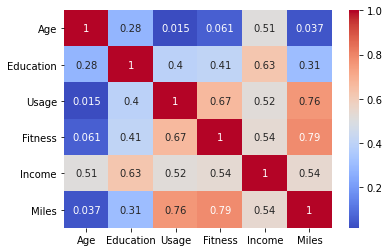

In [154]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#### Heatmap states 63% correlation between education and income, 76% correaltion from usage and miles , 79%  correlation from fitness and miles these are the some top correlated atrributes

## BUSINESS INSIGHTS

#### 1. 59% of customers having martial status 'partnered' prefer treadmills followed by single having 41% probability of buying treadmills

#### There is high demand of product type 'KP281' followed by 'KP481'

#### for product type KP281 both male and female having same probability of 0.22 of buying it

#### for product type KP481 - male(0.17) has slightly higher probability of then female(0.16)

#### for product type KP781 - probability of male(0.18) is higher than female(0.038)

#### 25th percentile of our customer income is 44000 and 50th percentile is approx 50500 and 75% our customer income is below 59000 

#### customers age in the range 22 - 26 has highest demands of treadmills

#### customers whose martialstatus is partnered buying product type 'kp281' have 26% probability.

#### single buying product type 'kp281'  having probability 17% which is less than partnered

#### probability of customers having martial status partnered buying product type 'kp481'  is 20 %

#### probability of customers having martial status Single buying product type 'kp481'  is 13% which is less than partnered probability

#### probability of customers having martial status partnerd buying product type 'kp781'  is 12%

#### probability of customers having martial status partnerd buying product type 'kp781'  is 9%

#### the average usage of product type KP781 is much higher than KP281 & KP481

#### customers having income greater than 50000 tend to buy product type KP781 and customers having income less than 55000 tend to buy product type 'KP481' and KP281

#### highly educated customers more likely to buy product kp781

#### customers those who walk more prefer to buy product type KP781

## RECOMMENDATIONS

#### we should produce High number of KP281 and KP481 type treadmill to fulfill the demand of market, as most of the economical class and customers having martial status 'partnered' more likely to buy this

#### we can recommend product type KP781 to highly educated and high income customers as they most likely to buy the products with advanced features

#### customers age in the range 22 - 26 has the highest demands of treadmills. we can target these customers to increase the sales

#### customers who walk more miles weekly more likely to buy KP781 we can recommend KP781 product to those customers to increase the sales of KP781

#### we can introduce promotional offeres for single to increase the sales of treadmills.because single are less likely to purchase the treadmill compared to partnered

#### we can introduce promotional offeres for customers whose age is above 40 to increase the sales of treadmills.because above 40 category are less likely to purchase the treadmill compared to below 40